## Setting up the env

In [2]:
import joblib # type: ignore
from matplotlib import pyplot as plt # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore
import kagglehub # type: ignore
!pip install tensorflow scikit-fuzzy #type: ignore


In [3]:
%pip install gdown

import gdown # type: ignore
# Replace 'FILE_ID' with the actual ID from the shared link
file_id = '1v14mK9IwSIz3sdruNnnwbc3BKsiJeGth'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'kaggle.json', quiet=True)

'kaggle.json'

In [4]:
!kaggle datasets download -d ananthr1/weather-prediction

Dataset URL: https://www.kaggle.com/datasets/ananthr1/weather-prediction
License(s): CC-BY-NC-SA-4.0
  0% 0.00/11.5k [00:00<?, ?B/s]
100% 11.5k/11.5k [00:00<00:00, 15.7MB/s]


In [6]:
# Make a directory for the Kaggle configuration and move the file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
path = '/content/weather-prediction.zip'

In [7]:
weather_data = pd.read_csv(path)

In [10]:
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


## Data processing

In [8]:
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['wind_speed'] = weather_data['wind']
weather_data['weather_status'] = weather_data['weather']
weather_data['max_temp'] = weather_data['temp_max']
weather_data['min_temp'] = weather_data['temp_min']
weather_data['mean_temp'] = (weather_data['temp_max'] * 0.45 + weather_data['temp_min'] * 0.55)

weather_data= weather_data.drop(['temp_max', 'temp_min', 'wind', 'weather'], axis = 1)
weather_data.head()

,date,precipitation,wind_speed,weather_status,max_temp,min_temp,mean_temp
0,2012-01-01,0.0,4.7,drizzle,12.8,5.0,8.510
1,2012-01-02,10.9,4.5,rain,10.6,2.8,6.310
2,2012-01-03,0.8,2.3,rain,11.7,7.2,9.225
3,2012-01-04,20.3,4.7,rain,12.2,5.6,8.570
4,2012-01-05,1.3,6.1,rain,8.9,2.8,5.545


In [10]:
usable_data = weather_data

## Setting up the model's training ENV

In [ ]:
# Original Source:

# https://www.researchgate.net/profile/Saban-Uenal-3/publication/360028250_Daily_average_relative_humidity_forecasting_with_LSTM_neural_network_and_ANFIS_approaches/links/6332b41986b22d3db4e6ebd8/Daily-average-relative-humidity-forecasting-with-LSTM-neural-network-and-ANFIS-approaches.pdf

In [ ]:
# Image source: A. Ozbek et al. 2022

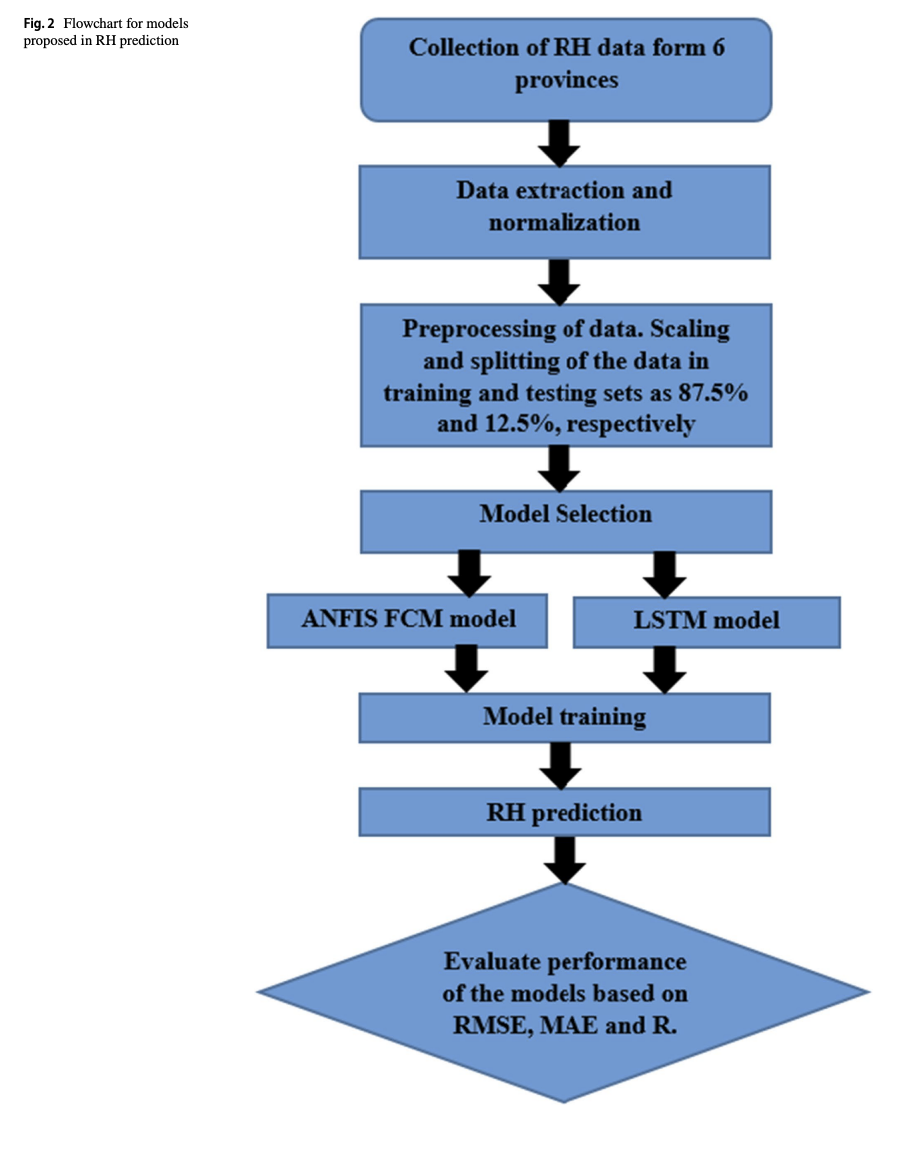

In [1]:
from sklearn.model_selection import TimeSeriesSplit # type: ignore
from sklearn.metrics import mean_squared_error, r2_score # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import LSTM, Dense # type: ignore


### Training the Precipitation model

In [ ]:
import numpy as np # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.models import Sequential # type: ignore # type: ignore
from tensorflow.keras.layers import Bidirectional, LSTM, Dense # type: ignore # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_error # for the evaluation: MSE, MAE


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(usable_data['precipitation'].values.reshape(-1, 1))

# define the sequence
def create_sequences(dataset, time_step = 1):
  X, y = [], []
  for i in range(len(dataset) - time_step -1):
     X.append(dataset[i:i + time_step, 0])
     y.append(dataset[i + time_step, 0])
  return np.array(X), np.array(y)



In [ ]:
time_step = 60 # how many pass day you want the model learn
X, y = create_sequences(scaled_data, time_step)
print(X)


[[0.         0.19499106 0.01431127 ... 0.         0.06440072 0.01431127]
 [0.19499106 0.01431127 0.36314848 ... 0.06440072 0.01431127 0.        ]
 [0.01431127 0.36314848 0.02325581 ... 0.01431127 0.         0.03577818]
 ...
 [0.03220036 0.34525939 0.59033989 ... 0.10375671 0.         0.15384615]
 [0.34525939 0.59033989 0.4686941  ... 0.         0.15384615 0.02683363]
 [0.59033989 0.4686941  0.00536673 ... 0.15384615 0.02683363 0.        ]]


In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM
print(X.shape)
print(X)

In [ ]:
train_size = int(len(X) *0.875)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
print(X_train.shape[1]) # number of day-the model have to learn
print(X_train.shape[0]) # number of the sample in the train set

60


In [ ]:

sequence_length = 14
prediction_length = 1


precipitation_model_LSTM = Sequential(
    [
        Bidirectional(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1))),
        Bidirectional(LSTM(units = 50, return_sequences = False)),
        Dense(units = 7), # Doing the dot product
        Dense(prediction_length) # the output dense layer - 7 values of prediction
    ]
)


precipitation_model_LSTM.compile(optimizer='adam', loss= 'mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
precipitation_model_LSTM.fit(X_train, y_train, epochs=5, batch_size=2, verbose=1)

Epoch 1/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - loss: 0.0131
Epoch 2/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - loss: 0.0099
Epoch 3/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - loss: 0.0115
Epoch 4/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - loss: 0.0092
Epoch 5/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - loss: 0.0149


In [ ]:
precipitation_model_LSTM.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_8 (Bidirectional)      │ (None, 60, 100)             │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             707 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,747 (959.95 KB)

 Trainable params: 81,915 (319.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,832 (639.97 KB)

In [ ]:
# evaluation
test_predict = precipitation_model_LSTM.predict(X_test)
# Reshape the arrays to 2D (e.g., if you have a single feature per sample)
print(y_test.shape)
print(test_predict.shape)
y_test_reshaped = y_test.reshape(-1, 1)  # Converts (175,) to (175, 1)

print(y_test_reshaped.shape)

rmse_lstm = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_reshaped), test_predict))
print(rmse_lstm)
mae_lstm = mean_absolute_error(scaler.inverse_transform(y_test_reshaped), test_predict)
print(mae_lstm)



6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step
(175,)
(175, 1)
(175, 1)
9.892934572833221
4.135946862936019


In [ ]:
print(scaler.inverse_transform(test_predict))

[[ 1.2458649]
 [ 1.2320153]
 [ 1.1929044]
 [ 1.2252926]
 [ 1.2815362]
 [ 1.2854823]
 [ 1.2849652]
 [ 1.2842797]
 [ 1.2833909]
 [ 1.2822653]
 [ 1.2808769]
 [ 1.2792146]
 [ 1.2772906]
 [ 1.2751548]
 [ 1.2728994]
 [ 1.2706653]
 [ 1.3824866]
 [ 1.3163202]
 [ 2.029578 ]
 [ 1.5969807]
 [ 1.3984613]
 [ 1.3053714]
 [ 1.2398856]
 [ 1.2885702]
 [ 1.290493 ]
 [ 1.2885165]
 [ 1.2878133]
 [ 1.2875441]
 [ 1.2873682]
 [ 1.2871572]
 [ 1.2868719]
 [ 1.2865143]
 [ 1.2861029]
 [ 1.285666 ]
 [ 1.2852331]
 [ 3.9406016]
 [ 2.4669228]
 [ 9.751564 ]
 [ 5.4051504]
 [ 3.1828275]
 [ 2.089816 ]
 [ 1.6147242]
 [ 1.418427 ]
 [ 2.0878563]
 [ 1.6463114]
 [ 1.4508963]
 [ 1.370725 ]
 [ 1.3380858]
 [ 1.3236617]
 [ 1.3148471]
 [ 1.314708 ]
 [ 1.5002337]
 [ 9.926312 ]
 [ 8.001655 ]
 [ 4.533581 ]
 [ 4.6004   ]
 [ 2.7538197]
 [ 1.900982 ]
 [ 1.5380111]
 [ 1.5092736]
 [ 3.2860281]
 [ 2.2945673]
 [ 1.7345345]
 [ 1.4922346]
 [ 1.3904662]
 [ 1.3473436]
 [ 1.3278198]
 [ 1.5067443]
 [ 1.3926808]
 [ 1.3388803]
 [ 1.6900547]
 [ 2.1

In [ ]:
# Test an Instance

input = np.array([[0.0], [13.2], [0.8], [20.3], [1.3], [5]]) # Raw Data
scaled_input = scaler.transform(input) # Normalized to (0,1)
input = scaled_input.reshape(1,-1,1)
result = precipitation_model_LSTM.predict(input) # return normalized res

result = scaler.inverse_transform(result) # convert to raw statistic

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[4.2424855]]


In [ ]:
joblib.dump(precipitation_model_LSTM, 'precipitation_predictor.joblib', 5)

['precipitation_predictor.joblib']

## Predict the mean temperature

In [ ]:
# The temperature predictor
sequence_length = 14
prediction_length = 1


temperature_model_LSTM = Sequential(
    [
        Bidirectional(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1))),
        Bidirectional(LSTM(units = 50, return_sequences = False)),
        Dense(units = 7), # Doing the dot product
        Dense(prediction_length) # the output dense layer - 7 values of prediction
    ]
)


temperature_model_LSTM.compile(optimizer='adam', loss= 'mse')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Prepare the train Dataset
scaled_data_temp = scaler.fit_transform(usable_data['mean_temp'].values.reshape(-1, 1))

In [ ]:
time_step = 60 # how many pass day you want the model learn
X_temp, y_temp = create_sequences(scaled_data_temp, time_step)
X_temp = X_temp.reshape(X_temp.shape[0], X_temp.shape[1], 1)  # Reshape for LSTM
print(X_temp.shape)
print(X_temp)


In [ ]:
train_size = int(len(X_temp) *0.875)
test_size = len(X_temp) - train_size
X_temp_train, X_temp_test = X_temp[:train_size], X_temp[train_size:]
y_temp_train, y_temp_test = y_temp[:train_size], y_temp[train_size:]

In [ ]:
temperature_model_LSTM.fit(X_temp_train, y_temp_train, epochs=5, batch_size=2, verbose=1)

Epoch 1/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - loss: 0.0210
Epoch 2/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - loss: 0.0068
Epoch 3/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - loss: 0.0048
Epoch 4/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 89s 92ms/step - loss: 0.0047
Epoch 5/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 66s 108ms/step - loss: 0.0045


In [ ]:
temperature_model_LSTM.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_10 (Bidirectional)     │ (None, 60, 100)             │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │             707 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,747 (959.95 KB)

 Trainable params: 81,915 (319.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,832 (639.97 KB)

In [ ]:
# evaluation
test_predict = temperature_model_LSTM.predict(X_temp_test)
# Reshape the arrays to 2D (e.g., if you have a single feature per sample)
print(y_temp_test.shape)
print(test_predict.shape)
y_temp_test_reshaped = y_test.reshape(-1, 1)  # Converts (175,) to (175, 1)

print(y_temp_test_reshaped.shape)

rmse_lstm = np.sqrt(mean_squared_error(scaler.inverse_transform(y_temp_test_reshaped), test_predict))
print(rmse_lstm)
mae_lstm = mean_absolute_error(scaler.inverse_transform(y_temp_test_reshaped), test_predict)
print(mae_lstm)


5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step
(175,)
(175, 1)
(175, 1)
5.422208555411422
4.534372314767219


In [ ]:
# Test an Instance

input = np.array([[8.0], [10.2], [0.8], [20.3], [1.3], [-8]]) # Raw Data
scaled_input = scaler.transform(input) # Normalized to (0,1)
input = scaled_input.reshape(1,-1,1)
result = temperature_model_LSTM.predict(input) # return normalized res

result = scaler.inverse_transform(result) # convert to raw statistic

print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[-4.1361175]]


In [ ]:
joblib.dump(temperature_model_LSTM, 'temperature_predictor.joblib', 5)

['temperature_predictor.joblib']

# Train the Max-Temp & mean Temp

In [11]:
usable_data.head()

,date,precipitation,wind_speed,weather_status,max_temp,min_temp,mean_temp
0,2012-01-01,0.0,4.7,drizzle,12.8,5.0,8.510
1,2012-01-02,10.9,4.5,rain,10.6,2.8,6.310
2,2012-01-03,0.8,2.3,rain,11.7,7.2,9.225
3,2012-01-04,20.3,4.7,rain,12.2,5.6,8.570
4,2012-01-05,1.3,6.1,rain,8.9,2.8,5.545


In [14]:
max_min_mean = usable_data[['max_temp', 'min_temp','mean_temp']].to_numpy()

In [15]:
print(max_min_mean)

[[12.8    5.     8.51 ]
 [10.6    2.8    6.31 ]
 [11.7    7.2    9.225]
 ...
 [ 7.2    0.6    3.57 ]
 [ 5.6   -1.     1.97 ]
 [ 5.6   -2.1    1.365]]


In [22]:
X = max_min_mean[:, None, :]
y = max_min_mean

In [23]:
print(y)

[[12.8    5.     8.51 ]
 [10.6    2.8    6.31 ]
 [11.7    7.2    9.225]
 ...
 [ 7.2    0.6    3.57 ]
 [ 5.6   -1.     1.97 ]
 [ 5.6   -2.1    1.365]]


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Define sequence length (14 timesteps) and prediction length (1 timestep)
sequence_length = 14
prediction_length = 1  # Predict a 3-feature vector for 1 timestep

# Define the LSTM model
temperature_model_LSTM = Sequential(
    [
        Bidirectional(
            LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 3))  # 3 features per timestep
        ),
        Bidirectional(LSTM(units=50, return_sequences=False)),  # No sequences at final LSTM output
        Dense(units=50, activation='relu'),  # Hidden dense layer (optional adjustment)
        Dense(units=3)  # Output layer: Predict ['max_temp', 'min_temp', 'mean_temp']
    ]
)

# Compile the model
temperature_model_LSTM.compile(optimizer='adam', loss='mse')

# Print the model summary for verification
temperature_model_LSTM.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Predict the Wind

In [ ]:
# The temperature speed
sequence_length = 14
prediction_length = 1


wind_model_LSTM = Sequential(
    [
        Bidirectional(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1))),
        Bidirectional(LSTM(units = 50, return_sequences = False)),
        Dense(units = 7), # Doing the dot product
        Dense(prediction_length) # the output dense layer - 7 values of prediction
    ]
)


wind_model_LSTM.compile(optimizer='adam', loss= 'mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Prepare the train Dataset
scaled_data_wind = scaler.fit_transform(usable_data['wind'].values.reshape(-1, 1))

In [ ]:
time_step = 60 # how many pass day you want the model learn
X_wind, y_wind = create_sequences(scaled_data_wind, time_step)
X_wind = X_wind.reshape(X_wind.shape[0], X_wind.shape[1], 1)  # Reshape for LSTM
print(X_wind.shape)
print(X_wind)

In [ ]:
train_size = int(len(X_wind) *0.875)
test_size = len(X_wind) - train_size
X_wind_train, X_wind_test = X_wind[:train_size], X_wind[train_size:]
y_wind_train, y_wind_test = y_wind[:train_size], y_wind[train_size:]

In [ ]:
wind_model_LSTM.fit(X_wind_train, y_wind_train, epochs=5, batch_size=2, verbose=1)

Epoch 1/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - loss: 0.0237
Epoch 2/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 48s 78ms/step - loss: 0.0225
Epoch 3/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - loss: 0.0197
Epoch 4/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 59s 96ms/step - loss: 0.0212
Epoch 5/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 74s 83ms/step - loss: 0.0204


In [ ]:
# evaluation
test_predict = wind_model_LSTM.predict(X_wind_test)
# Reshape the arrays to 2D (e.g., if you have a single feature per sample)
print(y_wind_test.shape)
print(test_predict.shape)
y_wind_test_reshaped = y_test.reshape(-1, 1)  # Converts (175,) to (175, 1)

print(y_wind_test_reshaped.shape)

rmse_lstm = np.sqrt(mean_squared_error(scaler.inverse_transform(y_wind_test_reshaped), test_predict))
print(rmse_lstm)
mae_lstm = mean_absolute_error(scaler.inverse_transform(y_wind_test_reshaped), test_predict)
print(mae_lstm)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
(175,)
(175, 1)
(175, 1)
1.6474500930571017
0.7810336732634674


In [ ]:
input = np.array([[3.2], [4.7], [4.6], [6.8], [4.5], [4.1]]) # Raw Data
scaled_input = scaler.transform(input) # Normalized to (0,1)
input = scaled_input.reshape(1,-1,1)
result = wind_model_LSTM.predict(input) # return normalized res

result = scaler.inverse_transform(result) # convert to raw statistic

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[3.2964141]]


In [ ]:
joblib.dump(wind_model_LSTM, 'wind_predictor.joblib', 5)

['wind_predictor.joblib']